A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [2]:
%pwd

'/home/dsc/Master-Data-Science/Pandas'

In [3]:
path_to_zips = '../data/us_dot/otp/'

In [4]:
! ls -l {path_to_zips} 

total 190200
-rwxr-x--- 1 dsc dsc 23061340 abr 21 09:08 On_Time_On_Time_Performance_2015_1.zip
-rwxr-x--- 1 dsc dsc 21230105 abr 21 09:08 On_Time_On_Time_Performance_2015_2.zip
-rwxr-x--- 1 dsc dsc 24811186 abr 21 09:08 On_Time_On_Time_Performance_2015_3.zip
-rwxr-x--- 1 dsc dsc 23625261 abr 21 09:08 On_Time_On_Time_Performance_2015_4.zip
-rwxr-x--- 1 dsc dsc 24334057 abr 21 09:08 On_Time_On_Time_Performance_2015_5.zip
-rwxr-x--- 1 dsc dsc 25758350 abr 21 09:08 On_Time_On_Time_Performance_2015_6.zip
-rwxr-x--- 1 dsc dsc 26204213 abr 21 09:08 On_Time_On_Time_Performance_2015_7.zip
-rwxr-x--- 1 dsc dsc 25726054 abr 21 09:08 On_Time_On_Time_Performance_2015_8.zip


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [5]:
! unzip -l {path_to_zips}On_Time_On_Time_Performance_2015_1.zip

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  2015-04-16 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  2015-04-16 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [6]:
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html -d $(pwd)

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: /home/dsc/Master-Data-Science/Pandas/readme.html  


In [7]:
! ls -lrt

total 394700
-rw-r--r-- 1 dsc dsc     12054 abr 16  2015 readme.html
-rw-r--r-- 1 dsc dsc 211633432 abr 16  2015 On_Time_On_Time_Performance_2015_1.csv
-rw-r--r-- 1 dsc dsc      4268 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_Terms.csv
-rw-r--r-- 1 dsc dsc      4341 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_ReadMe.csv
-rw-r--r-- 1 dsc dsc  51575427 nov  8  2015 914310910_T_T100_SEGMENT_ALL_CARRIER_2015_All.csv
-rwxr-xr-x 1 dsc dsc    429162 may  1 18:30 07-Numpy_Pandas_Introduction.ipynb
-rw-r--r-- 1 dsc dsc         0 may  1 18:54 multas.csv
-rw-r--r-- 1 dsc dsc  11007488 may  1 23:18 out.xls
-rw-r--r-- 1 dsc dsc   4363924 may  1 23:19 out.xlsx
-rw-r--r-- 1 dsc dsc  45901761 may  1 23:19 out.csv
-rw-r--r-- 1 dsc dsc  77082624 may  2 11:22 example.db
-rw-r--r-- 1 dsc dsc      3262 may  2 11:28 accidentes.xls
-rwxr-xr-x 1 dsc dsc    565103 may  2 12:13 07-Loading_Saving_Data_20180413.ipynb
-rwxrwxrwx 1 dsc dsc     81747 may  2 13:52 08-Merge_Concatenate_Transform_20180414.

### Take a look at the beginning of the readme file

using the shell

In [8]:
! cat readme.html | wc -l

125


In [9]:
! head readme.html 

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [10]:
from IPython.display import IFrame
IFrame('readme.html', width=800, height=450)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [11]:
# have a look at the beginning of one of the files to see what they look like

! unzip -p {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

**Note:** *remember that all the files are indeed part files of the same .zip. And the Readme file is within the .zip.*

In [12]:
import os
import zipfile

filenames = os.listdir(path_to_zips)

zip_file = zipfile.ZipFile(path_to_zips + filenames[0])

In [13]:
print(filenames)

['On_Time_On_Time_Performance_2015_2.zip', 'On_Time_On_Time_Performance_2015_8.zip', 'On_Time_On_Time_Performance_2015_4.zip', 'On_Time_On_Time_Performance_2015_3.zip', 'On_Time_On_Time_Performance_2015_7.zip', 'On_Time_On_Time_Performance_2015_1.zip', 'On_Time_On_Time_Performance_2015_6.zip', 'On_Time_On_Time_Performance_2015_5.zip']


zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [14]:
zip_file.filelist

[<ZipInfo filename='On_Time_On_Time_Performance_2015_2.csv' compress_type=deflate filemode='-rw-r--r--' file_size=192791767 compress_size=21227521>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>]

In [15]:
csv, readme = zip_file.filelist
print(readme)
print()
print(csv)
print()
print(csv.filename)

<ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12054 compress_size=2208>

<ZipInfo filename='On_Time_On_Time_Performance_2015_2.csv' compress_type=deflate filemode='-rw-r--r--' file_size=192791767 compress_size=21227521>

On_Time_On_Time_Performance_2015_2.csv


Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [16]:
# We reopen the file because we have already consumed the header line.
import pandas as pd

csv_file = zip_file.open(csv.filename)
df = pd.read_csv(csv_file, low_memory=False)

csv_file.close()
zip_file.close()

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [17]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,1,2,7,6,2015-02-07,AS,19930,AS,N618AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,7,6,2015-02-07,AS,19930,AS,N778AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,7,6,2015-02-07,AS,19930,AS,N586AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,7,6,2015-02-07,AS,19930,AS,N615AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,7,6,2015-02-07,AS,19930,AS,N471AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(429191, 110)

In [19]:
print(df.size)
df.size == df.shape[0] * df.shape[1]

47211010


True

In [20]:
df.dtypes.head(20)

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
UniqueCarrier         object
AirlineID              int64
Carrier               object
TailNum               object
FlightNum              int64
OriginAirportID        int64
OriginAirportSeqID     int64
OriginCityMarketID     int64
Origin                object
OriginCityName        object
OriginState           object
OriginStateFips        int64
OriginStateName       object
OriginWac              int64
dtype: object

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [21]:
df.count().tail()

Div5TotalGTime      0
Div5LongestGTime    0
Div5WheelsOff       0
Div5TailNum         0
Unnamed: 109        0
dtype: int64

In [22]:
non_null_counts = df.count()

non_null_counts[non_null_counts < 1000]

DivActualElapsedTime    706
DivArrDelay             706
Div1WheelsOff           719
Div1TailNum             719
Div2Airport              14
Div2AirportID            14
Div2AirportSeqID         14
Div2WheelsOn             14
Div2TotalGTime           14
Div2LongestGTime         14
Div2WheelsOff             1
Div2TailNum               1
Div3Airport               0
Div3AirportID             0
Div3AirportSeqID          0
Div3WheelsOn              0
Div3TotalGTime            0
Div3LongestGTime          0
Div3WheelsOff             0
Div3TailNum               0
Div4Airport               0
Div4AirportID             0
Div4AirportSeqID          0
Div4WheelsOn              0
Div4TotalGTime            0
Div4LongestGTime          0
Div4WheelsOff             0
Div4TailNum               0
Div5Airport               0
Div5AirportID             0
Div5AirportSeqID          0
Div5WheelsOn              0
Div5TotalGTime            0
Div5LongestGTime          0
Div5WheelsOff             0
Div5TailNum         

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [23]:
df.columns[non_null_counts < 1000]

Index(['DivActualElapsedTime', 'DivArrDelay', 'Div1WheelsOff', 'Div1TailNum',
       'Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
       'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
       'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
       'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
       'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
       'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
       'Unnamed: 109'],
      dtype='object')

In [24]:
# Dropping inplace leads to confusion. Confusion leads to fear. 
# Fear leads to anger. Anger leads to hate. Hate leads to suffering.

df2 = df.drop(df.columns[non_null_counts < 1000], axis=1) #by default df.drop will take out rows, axis = 0

In [25]:
df2.shape

(429191, 73)

In [26]:
# Another way to do it

df.dropna(axis=1, thresh=1000).shape

(429191, 73)

In [27]:
df.dropna(axis=1, thresh=1000).shape == df2.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [28]:
# FIRST
df2.columns[df2.columns.str.upper().str.contains('ORIGIN')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [29]:
#another way to do it, by using list comprehensions

[each for each in df2.columns if 'ORIGIN' in each.upper()]

['OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac']

In [30]:
# SECOND

df[df2.columns[df2.columns.str.upper().str.contains('ORIGIN')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
199856,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22
106978,13367,1336703,33367,MLI,"Moline, IL",IL,17,Illinois,41
214992,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13
310904,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
267359,13232,1323202,30977,MDW,"Chicago, IL",IL,17,Illinois,41


So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [31]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df2.sample(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance
167715,2015-02-27,5,B6,N187JB,1190,DCA,"Washington, DC",Virginia,BOS,"Boston, MA",Massachusetts,656.0,-4.0,58.0,399.0
407486,2015-02-02,1,US,NaN,2138,LGA,"New York, NY",New York,BOS,"Boston, MA",Massachusetts,NaN,NaN,NaN,184.0
251052,2015-02-09,1,WN,N794SW,250,DEN,"Denver, CO",Colorado,MDW,"Chicago, IL",Illinois,1310.0,10.0,103.0,895.0
119504,2015-02-15,7,AA,N004AA,1011,ELP,"El Paso, TX",Texas,DFW,"Dallas/Fort Worth, TX",Texas,727.0,14.0,72.0,551.0
31371,2015-02-06,5,EV,N12166,4285,IAH,"Houston, TX",Texas,GSP,"Greer, SC",South Carolina,1910.0,3.0,117.0,837.0


## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [32]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [33]:
df2['DepTime'].head()

0     959.0
1    1717.0
2    1132.0
3    2201.0
4    1941.0
Name: DepTime, dtype: float64

In [34]:
# We'll need to take an int and return a string of the appropriate format
import numpy as np

def deptime_to_string(num):
    if num!=num:    # If np.nan better handle this
        num =0.0;

    hour = int(num / 100) % 24 # There are i.e. 24:20 in the data, which datetime doesn't like.
    minute = int(num % 100)
    

    return '%02d:%02d' % (hour, minute)

deptime_to_string(24.0)

'00:24'

In [35]:
df2['FlightDate'].head()

0    2015-02-07
1    2015-02-07
2    2015-02-07
3    2015-02-07
4    2015-02-07
Name: FlightDate, dtype: object

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

In [36]:
series1 = df2['DepTime'].apply(deptime_to_string)
series1.head(10)

0    09:59
1    17:17
2    11:32
3    22:01
4    19:41
5    23:31
6    10:52
7    12:57
8    19:02
9    16:46
Name: DepTime, dtype: object

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable (this takes care of not messing up with the index!).

In [37]:
df2['DepTime'].count()

409132

In [38]:
series = df2['DepTime'].dropna().apply(deptime_to_string)
series.count()

409132

In [39]:
df2['DepTimeStr'] = series

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
# What happened to the nan? They are still nan, because our Series didn't contain them. 
# Therefore, when we put the Series back into the Dataframe, those cells stayed empty.
df2['DepTimeStr'].count() == df2['DepTime'].count()

True

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [41]:
# This is the format pd.to_datetime needs:

ts = pd.to_datetime('2015-01-15 08:30')
ts

Timestamp('2015-01-15 08:30:00')

In [42]:
df2['DepTimeStr'].head()

0    09:59
1    17:17
2    11:32
3    22:01
4    19:41
Name: DepTimeStr, dtype: object

In [43]:
df2['FlightDate'].head()

0    2015-02-07
1    2015-02-07
2    2015-02-07
3    2015-02-07
4    2015-02-07
Name: FlightDate, dtype: object

In [46]:
series2 = df2['FlightDate'].head() + ' ' + df2['DepTimeStr'].head()
pd.to_datetime(series2)

0   2015-02-07 09:59:00
1   2015-02-07 17:17:00
2   2015-02-07 11:32:00
3   2015-02-07 22:01:00
4   2015-02-07 19:41:00
dtype: datetime64[ns]

In [47]:
departure_datetimes = pd.to_datetime(df2['FlightDate'] + ' ' + df2['DepTimeStr'])
df2['DepDateTime'] = departure_datetimes

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
# Drop the now-redundant columns
df3 = df2.drop(['FlightDate', 'DepTime', 'DepTimeStr'], axis=1)

In [49]:
df3.sample(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
142086,7,AS,N442AS,461,LAX,"Los Angeles, CA",California,SEA,"Seattle, WA",Washington,-1.0,137.0,954.0,2015-02-01 17:39:00
185179,4,DL,N906DE,2216,ATL,"Atlanta, GA",Georgia,ABQ,"Albuquerque, NM",New Mexico,0.0,179.0,1269.0,2015-02-05 16:55:00
225578,6,VX,N853VA,929,LAX,"Los Angeles, CA",California,SFO,"San Francisco, CA",California,-2.0,52.0,337.0,2015-02-14 13:28:00
305023,3,WN,N739GB,711,SAT,"San Antonio, TX",Texas,LAS,"Las Vegas, NV",Nevada,-1.0,157.0,1069.0,2015-02-25 07:59:00
312845,5,WN,N624SW,140,BUF,"Buffalo, NY",New York,MCO,"Orlando, FL",Florida,-4.0,155.0,1011.0,2015-02-27 18:46:00


### Inspect the types, see if everything is in order

In [50]:
df3.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [51]:
df3.sort_values(by='DepDelay', ascending=False).head(5)

,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,AirTime,Distance,DepDateTime
126203,6,AA,N028AA,1312,STL,"St. Louis, MO",Missouri,MIA,"Miami, FL",Florida,1587.0,131.0,1068.0,2015-02-28 08:47:00
117050,7,AA,N007AA,1080,EGE,"Eagle, CO",Colorado,ORD,"Chicago, IL",Illinois,1457.0,123.0,1007.0,2015-02-22 14:32:00
73864,7,HA,N374HA,50,HNL,"Honolulu, HI",Hawaii,JFK,"New York, NY",New York,1433.0,498.0,4983.0,2015-02-08 16:23:00
73885,1,HA,N374HA,51,JFK,"New York, NY",New York,HNL,"Honolulu, HI",Hawaii,1429.0,684.0,4983.0,2015-02-09 09:24:00
131625,4,AA,N3ASAA,1564,PHX,"Phoenix, AZ",Arizona,ORD,"Chicago, IL",Illinois,1367.0,167.0,1440.0,2015-02-19 05:54:00


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [52]:
df2['DepDelay'].describe()

count    409132.000000
mean         11.885284
std          40.143735
min         -61.000000
25%          -4.000000
50%          -1.000000
75%          11.000000
max        1587.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [53]:
df2.corr()

,DayOfWeek,FlightNum,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.015379,-0.000962,-0.018116,0.015865,0.021141
FlightNum,0.015379,1.000000,0.003175,0.002797,-0.333575,-0.349537
DepTime,-0.000962,0.003175,1.000000,0.171702,-0.025086,-0.022557
DepDelay,-0.018116,0.002797,0.171702,1.000000,0.021388,0.020472
AirTime,0.015865,-0.333575,-0.025086,0.021388,1.000000,0.977982
Distance,0.021141,-0.349537,-0.022557,0.020472,0.977982,1.000000


#### Exercise

What is the origin that has the highest average delay? We'll first group by origin and then calculate the relevant statistic for each group (group of *departures*)

In [54]:
grouped_by_origin = df3.groupby('Origin')
type(grouped_by_origin)

pandas.core.groupby.DataFrameGroupBy

In [55]:
grouped_by_origin['DepDelay'].mean().sort_values(ascending=False).head()

Origin
TTN    49.747423
ILG    40.789474
UST    39.000000
SMX    32.327273
JLN    31.120000
Name: DepDelay, dtype: float64

But the mean can be only meaningful if we had enough samples. Lets check that! We can aggregate *mean* and *count* at the same time.

In [56]:
delays_by_origin = grouped_by_origin['DepDelay'].agg(['mean', 'count'])

delays_by_origin.sort_values('mean', ascending=False).head(10)

,mean,count
Origin,,
TTN,49.747423,194
ILG,40.789474,19
UST,39.000000,11
SMX,32.327273,55
JLN,31.120000,50
PLN,30.500000,46
MKG,27.500000,46
SCE,26.888889,54
SUX,26.772727,44


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [57]:
consistently_delayed = delays_by_origin[delays_by_origin['count'] > 14]
highly_delayed = consistently_delayed.sort_values('mean', ascending=False).head(100)
highly_delayed.head(10)

,mean,count
Origin,,
TTN,49.747423,194
ILG,40.789474,19
SMX,32.327273,55
JLN,31.120000,50
PLN,30.500000,46
MKG,27.500000,46
SCE,26.888889,54
SUX,26.772727,44
SWF,26.060606,66


In [58]:
# What companies run the rank 5/10 most delayed?
df3.join(highly_delayed.head(5), on='Origin', how='inner')['Carrier'].unique()

array(['F9', 'MQ', 'OO'], dtype=object)

#### Exercise: 

Show cities by descending number of airports

In [66]:
df3.groupby('OriginCityName')['Origin'].count().head() # number of flights per Origin

OriginCityName
Aberdeen, SD        56
Abilene, TX        215
Adak Island, AK      8
Aguadilla, PR       84
Akron, OH          514
Name: Origin, dtype: int64

In [78]:
df2.groupby('OriginCityName')['Origin'].unique().tail(15) # number of airports code per City

OriginCityName
Vernal, UT                             [VEL]
Waco, TX                               [ACT]
Washington, DC                    [DCA, IAD]
Waterloo, IA                           [ALO]
West Palm Beach/Palm Beach, FL         [PBI]
White Plains, NY                       [HPN]
Wichita Falls, TX                      [SPS]
Wichita, KS                            [ICT]
Williston, ND                          [ISN]
Wilmington, DE                         [ILG]
Wilmington, NC                         [ILM]
Worcester, MA                          [ORH]
Wrangell, AK                           [WRG]
Yakutat, AK                            [YAK]
Yuma, AZ                               [YUM]
Name: Origin, dtype: object

In [81]:
airports_by_city = df2.groupby('OriginCityName')['Origin'].unique()

We have a list of Airport code for each city now.

In [77]:
airports_by_city.map(lambda x: len(x)).sort_values(ascending=False).head(10)

OriginCityName
Chicago, IL            2
Houston, TX            2
New York, NY           2
Washington, DC         2
Fargo, ND              1
Fayetteville, AR       1
Fayetteville, NC       1
Flagstaff, AZ          1
Flint, MI              1
Fort Lauderdale, FL    1
Name: Origin, dtype: int64

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

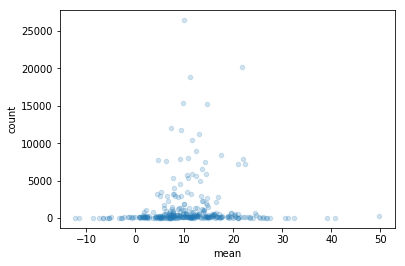

In [115]:
import matplotlib.pyplot as plt 
%matplotlib inline

ax = delays_by_origin.plot.scatter('mean', 'count', alpha=.2)
#ax.set_xlim(-20,50)
#ax.set_ylim(0,5000)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

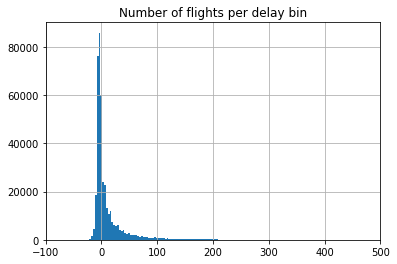

In [123]:
# Little trick: Just by importing seaborn, it will change 
# matplotlib defaults and make your graphs much prettier.!!

import seaborn as sns

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)

plt.title('Number of flights per delay bin')
plt.show()

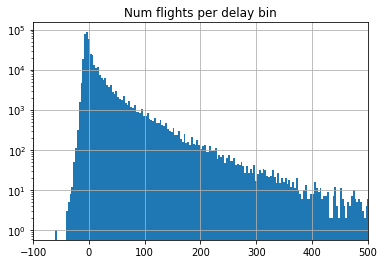

In [124]:
# We can make any axis logarithmic in order to see better a very unequal distribution

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)
plt.title('Num flights per delay bin')

plt.yscale('log')


### Another question:

How do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [125]:
# Now, we can iterate over the groups and extract the delays. 
# We keep them in two different vectors because that is what boxplot wants

df2['DepHour'] =  df2['DepDateTime'].map(lambda x: x.hour)

by_hour = df2.groupby('DepHour')

hours = []
groups = []

for h, g in by_hour:
    hours.append("%02d" % h)
    groups.append(g['DepDelay'])

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [138]:
# We have created a groupby object. That object behaves like a list.
# Each element of that list is a (key, dataframe) tuple.
# You can think of the key as the group's name. The dataframe
# contains all the rows in the original dataframe that correspond 
# to that key: Here, group '0.0' contains all rows from flights 
# that departed on hour 0.

print(type(by_hour))
print(list(by_hour)[10])
print(list(by_hour)[0], list(by_hour)[0][1].shape)

<class 'pandas.core.groupby.DataFrameGroupBy'>
(10.0,         FlightDate  DayOfWeek Carrier TailNum  FlightNum Origin  \
6       2015-02-07          6      AS  N764AS        151    ANC   
31      2015-02-07          6      AS  N794AS        303    SFO   
40      2015-02-07          6      AS  N796AS        318    SEA   
57      2015-02-07          6      AS  N431AS        346    SEA   
105     2015-02-07          6      AS  N512AS        481    SAN   
109     2015-02-07          6      AS  N403AS        490    SEA   
125     2015-02-07          6      AS  N585AS        523    BUR   
173     2015-02-07          6      AS  N615AS        619    LAS   
178     2015-02-07          6      AS  N402AS        627    LAS   
193     2015-02-07          6      AS  N467AS        648    SEA   
200     2015-02-07          6      AS  N419AS        656    SEA   
219     2015-02-07          6      AS  N592AS        688    PDX   
237     2015-02-07          6      AS  N461AS        730    SEA   
246     

(0.0,         FlightDate  DayOfWeek Carrier TailNum  FlightNum Origin  \
271     2015-02-07          6      AS  N590AS        816    LIH   
399     2015-02-08          7      AS  N769AS         98    ANC   
405     2015-02-08          7      AS  N471AS        108    ANC   
412     2015-02-08          7      AS  N556AS        122    ANC   
960     2015-02-19          4      DL  N383DN        765    LAX   
991     2015-02-19          4      DL  N127DL        806    SFO   
1065    2015-02-19          4      DL  N589NW        892    LAX   
1119    2015-02-19          4      DL  N339NB        993    ATL   
1482    2015-02-20          5      DL  N345NW        922    DEN   
1589    2015-02-20          5      DL  N144DA       1099    SFO   
1793    2015-02-20          5      DL  N690DL       1264    SLC   
2161    2015-02-20          5      DL  N3741S       1560    ANC   
2369    2015-02-20          5      DL  N366NW       1722    SLC   
2625    2015-02-18          3      DL  N378DA       2354

### Everything looks ok! let's plot this thing!

/home/dsc/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


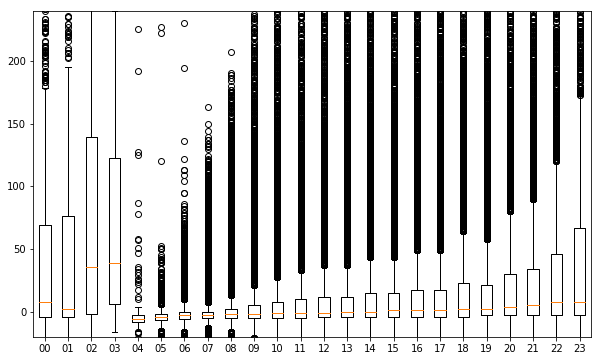

In [139]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_ylim(-20, 240)

bp = plt.boxplot(groups)

labels = plt.setp(ax1, xticklabels=hours)